<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Quartile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/Thesis Project Kidney/Assign 3 : Re-CalculateSlope&Quartile/LabSlope.xlsx')
slope.head()

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slope
0,2299,3640924,66.8,2016-11-11 09:40:06.053,87,0.767816
1,2299,4020970,67.2,2017-03-31 10:18:54.363,140,0.480000
2,2299,4286612,69.2,2017-07-05 10:40:40.763,96,0.720833
3,2299,4546471,63.6,2017-10-03 09:19:54.710,89,0.714607
4,2299,4801938,58.4,2018-01-04 09:03:28.847,92,0.634783


In [4]:
slope.isnull().any()

PatientUID         False
PatientVisitUID    False
ResultValue        False
datetime           False
TimeDiff           False
Slope              False
dtype: bool

In [6]:
import pandas as pd

# Assuming your data is in the 'slope' DataFrame
# Replace 'your_data.csv' with the path to your data file if reading from a CSV file.
# slope = pd.read_csv('your_data.csv')

# Step 1: Calculate the fixed median
fixed_median = 4

# Step 2: Sort the 'slopes' column
slope_sorted = slope.sort_values(by='Slope')

# Step 3: Divide the sorted 'slopes' column into quartiles
quartile_1 = slope_sorted['Slope'].quantile(0.25)
quartile_2 = slope_sorted['Slope'].quantile(0.5)  # Median
quartile_3 = slope_sorted['Slope'].quantile(0.75)

# Step 4: Create a new column to store the quartile group information
def assign_quartile_group(slope_val):
    if slope_val <= quartile_1:
        return 'Q1'
    elif slope_val <= quartile_2:
        return 'Q2'
    elif slope_val <= quartile_3:
        return 'Q3'
    else:
        return 'Q4'

slope['quartile_group'] = slope['Slope'].apply(assign_quartile_group)

# Output the updated DataFrame
slope

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slope,quartile_group
0,2299,3640924,66.80,2016-11-11 09:40:06.053,87,0.767816,Q3
1,2299,4020970,67.20,2017-03-31 10:18:54.363,140,0.480000,Q2
2,2299,4286612,69.20,2017-07-05 10:40:40.763,96,0.720833,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,89,0.714607,Q2
4,2299,4801938,58.40,2018-01-04 09:03:28.847,92,0.634783,Q2
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,83,0.591928,Q2
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,25,1.940400,Q4
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,17,3.982941,Q4
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,28,2.453214,Q4


##**check**

In [7]:
slope[slope['Slope'] == float('inf')]

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slope,quartile_group


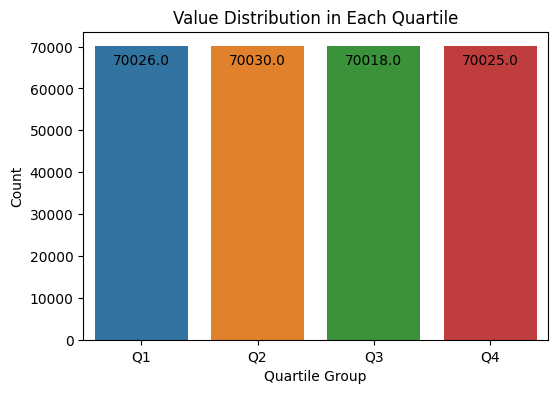

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated the 'quartile_group' column in the 'slope' DataFrame

# Step 1: Group the data by the 'quartile_group' and count the number of occurrences in each group
quartile_counts = slope['quartile_group'].value_counts()

# Step 2: Create a bar plot to visualize the quartile distribution with actual counts on top of each bar
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=quartile_counts.index, y=quartile_counts.values)
plt.xlabel('Quartile Group')
plt.ylabel('Count')
plt.title('Value Distribution in Each Quartile')

# Display the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -10), textcoords='offset points')

plt.show()

In [9]:
import pandas as pd

# Assuming you have already calculated the 'quartile_group' column in the 'slope' DataFrame

# Step 1: Group the data by the 'quartile_group'
grouped = slope.groupby('quartile_group')

# Step 2: Calculate the minimum and maximum values in each group
min_max_values = grouped['Slope'].agg(['min', 'max'])

# Output the minimum and maximum values in each quartile group
min_max_values

,min,max
quartile_group,,
Q1,0.001411,0.438922
Q2,0.438929,0.719780
Q3,0.719792,1.711628
Q4,1.711724,67.520000


In [14]:
slope

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slope,quartile_group
0,2299,3640924,66.80,2016-11-11 09:40:06.053,87,0.767816,Q3
1,2299,4020970,67.20,2017-03-31 10:18:54.363,140,0.480000,Q2
2,2299,4286612,69.20,2017-07-05 10:40:40.763,96,0.720833,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,89,0.714607,Q2
4,2299,4801938,58.40,2018-01-04 09:03:28.847,92,0.634783,Q2
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,83,0.591928,Q2
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,25,1.940400,Q4
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,17,3.982941,Q4
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,28,2.453214,Q4


In [15]:
# Count the number of records in each group
group_counts = slope['quartile_group'].value_counts()

# Iterate over quartile groups and print the count
for group_label, count in group_counts.items():
    print(f'Quartile Group {group_label}: {count} records')

Quartile Group Q2: 70030 records
Quartile Group Q1: 70026 records
Quartile Group Q4: 70025 records
Quartile Group Q3: 70018 records


In [18]:
quartile = slope[['PatientUID','PatientVisitUID','ResultValue','datetime','Slope','TimeDiff','quartile_group']]
quartile

,PatientUID,PatientVisitUID,ResultValue,datetime,Slope,TimeDiff,quartile_group
0,2299,3640924,66.80,2016-11-11 09:40:06.053,0.767816,87,Q3
1,2299,4020970,67.20,2017-03-31 10:18:54.363,0.480000,140,Q2
2,2299,4286612,69.20,2017-07-05 10:40:40.763,0.720833,96,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,0.714607,89,Q2
4,2299,4801938,58.40,2018-01-04 09:03:28.847,0.634783,92,Q2
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,0.591928,83,Q2
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,1.940400,25,Q4
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,3.982941,17,Q4
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,2.453214,28,Q4


In [24]:
quartile.to_excel("Quartile.xlsx", index=False)